# Case study: Video games sales over the last couple of years

This program should answer the following questions:

* What is the most popular game/The Worst game ?

* How many games are rated highly?

* Times the games genres have been been wishlisted?

* What is the most popular Genre

* The correlation of backlogs to the rest of the data frame.


In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
file_path = "data sets pandas folder/games.csv"
df_game = pd.read_csv(file_path)
df_game


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


## Understanding the Data
I am seeing what is in the data sets and the raw data 

This is a description of all the headers in my data frame 
Header|	Description|
|:--|:--|
Title|	Title of video games
Release Date|	Release date of video games
Team|	The team that designed the video game
Rating|	Rating of each video game
Total|	Total number of people with major
Times Listed|	Number of times the game was listed
Number of Reviews	| Total number of reviews for a video game
Genres	|	The all the genres related to the video game
Summary|	Description of the game
Reviews|	What the players put down as a review
Plays|	Number of times a game was played
Playing|	Current amount of players playing
Backlogs|	Games people have put in their backlog or games they will play later
Wishlist|	Games people have wishlisted or save for purchase later




df_game.describe() # Describe the data set set with values

In [244]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [246]:
df_game.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

## Data Cleaning
Their was a lot of cleaning that I had to do for my data set on video games
* I had to remove the column 'Unnamed: 0'
* Remove the null values in the data set
* I had to fix the data set and remove the K value and get it muliplied
* I had to remove the empty brackets in genre
* Dropped the duplicates in titles
* I seperated the Genres in the data frame to get them seperated into individual columns


### I had gotten rid of the Unnamed: 0 columns because it was a duplicate of the index

In [250]:
df_game = df_game.drop('Unnamed: 0', axis = 1 ) # Remove the extra Unmaed: 0 column which is a duplicate of the 
# index
df_game

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


### Checked for Nan values and released 13 of them is for ratings and 1 is for a gaming team.

In [253]:
df_game.notnull().sum()
# Their is 14 NaN values or missing values
#13 of them is for rating and 1 is for Team.

Title                1512
Release Date         1512
Team                 1511
Rating               1499
Times Listed         1512
Number of Reviews    1512
Genres               1512
Summary              1511
Reviews              1512
Plays                1512
Playing              1512
Backlogs             1512
Wishlist             1512
dtype: int64

### Dropped the Nan values in the data set

In [256]:
df_game = df_game.dropna() # drop Nan values
df_game

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


### I had gotten rid of the K values throw the data frame and I had multiplied the Values that had K by 1000 
### This game me numeric values that pandas and numpy can understand and Matplotlib

In [259]:
df_game = df_game.copy()

In [261]:
df_game['Wishlist'] = df_game['Wishlist'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_game['Playing'] = df_game['Playing'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_game['Backlogs'] = df_game['Backlogs'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float) 
df_game['Plays'] = df_game['Plays'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float) 
df_game['Number of Reviews'] = df_game['Number of Reviews'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_game['Number of Reviews'] = df_game['Number of Reviews'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_game['Times Listed'] = df_game['Times Listed'].replace({'K': '*1e3'}, regex=True).map(pd.eval).astype(float)
df_game_K_removed = df_game
# To convert all the columns that had values followed by K to be converted into it's proper numeric value. 
# This also is converts: Wishlist, Playing, Backlogs, Number of Reviews, Times Listed.
# Source: Skytower K/M Conversion
# Link: https://www.skytowner.com/explore/converting_k_and_m_to_numerical_form_in_pandas_dataframe

### I had gotten rid of the Genres that had empty brackets for Genres

In [264]:
df_game_K_removed = df_game_K_removed[df_game_K_removed['Genres'] != '[]']
df_game_K_removed # This is to remove rows that have empty brackets which are Nan null values.

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94.0,94.0,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,5.0,223.0,67.0
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264.0,264.0,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,49.0,413.0,107.0
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210.0,210.0,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,45.0,487.0,206.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0


### Checked to see the total duplicates in the Data Frame

In [267]:
df_game_K_removed_dups = df_game_K_removed.duplicated() # Find if their is duplicates in the DataFrame
df_game_K_removed_dups_count = df_game_K_removed_dups.sum() # Finds out the total number of duplicates in the DataFrame
df_game_K_removed_dups_count #Show the dataframe

382

### Got rid of all duplicates in the data frame they were duplicates in the title column.

In [270]:
df_game_K_removed = df_game_K_removed.drop_duplicates(subset = 'Title') #Remove the duplicate Tiles throughout the data frame.
df_game_K_removed

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000.0,3000.0,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94.0,94.0,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,5.0,223.0,67.0
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264.0,264.0,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,49.0,413.0,107.0
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210.0,210.0,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,45.0,487.0,206.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0


In [272]:
df_game_K_removed.info()# checking if the Data is accurate

<class 'pandas.core.frame.DataFrame'>
Index: 1083 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1083 non-null   object 
 1   Release Date       1083 non-null   object 
 2   Team               1083 non-null   object 
 3   Rating             1083 non-null   float64
 4   Times Listed       1083 non-null   float64
 5   Number of Reviews  1083 non-null   float64
 6   Genres             1083 non-null   object 
 7   Summary            1083 non-null   object 
 8   Reviews            1083 non-null   object 
 9   Plays              1083 non-null   float64
 10  Playing            1083 non-null   float64
 11  Backlogs           1083 non-null   float64
 12  Wishlist           1083 non-null   float64
dtypes: float64(7), object(6)
memory usage: 118.5+ KB


### Cleaned up and seperated the Genres column in the data frame to seperate columns to get
### specific genres to be seperated 

In [275]:
#I used regex which stands for regular expressions to remove the extra brackets in the Genres column.
df_game_K_removed.loc[:, 'Genres'] = df_game_K_removed['Genres'].str.replace("'", '',  regex=True)  # This removes the character's 
# single quotes
df_game_K_removed.loc[:, 'Genres'] = df_game_K_removed['Genres'].str.strip("]" ) # This removes the end bracket in 
# the genres list
df_game_K_removed.loc[:, 'Genres'] = df_game_K_removed['Genres'].str.strip("[") # This removes the front bracket in
df_game_K_removed.loc[:, 'Genres'] = df_game_K_removed['Genres'].str.strip('') # This removes the spaces in front of the 
 


df_game_K_removed.loc[:, 'Genres'] = df_game_K_removed['Genres'].str.split(',', regex = True) # Split genres by comma


# Exploding the Genres column into separate rows
df_game_exploded = df_game_K_removed.explode('Genres')  
df_game_exploded


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Brawler,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Indie,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Tactical,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700.0,11.0,239.0,73.0


In [277]:
### Make sure the Genres is striped of any spaces

In [279]:
df_game_exploded['Genres'] = df_game_exploded['Genres'].str.strip()
df_game_exploded

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Brawler,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900.0,2900.0,Indie,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Tactical,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0
1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1700.0,11.0,239.0,73.0


# Data Analysis
This is where I answered all the question of my data and analyzing to see if their is correlations in the
data.

### This is the data analysis of the total amount of each genre in the entire data frame
Adventure games is the most popular and played but pinball has the least in the data frame

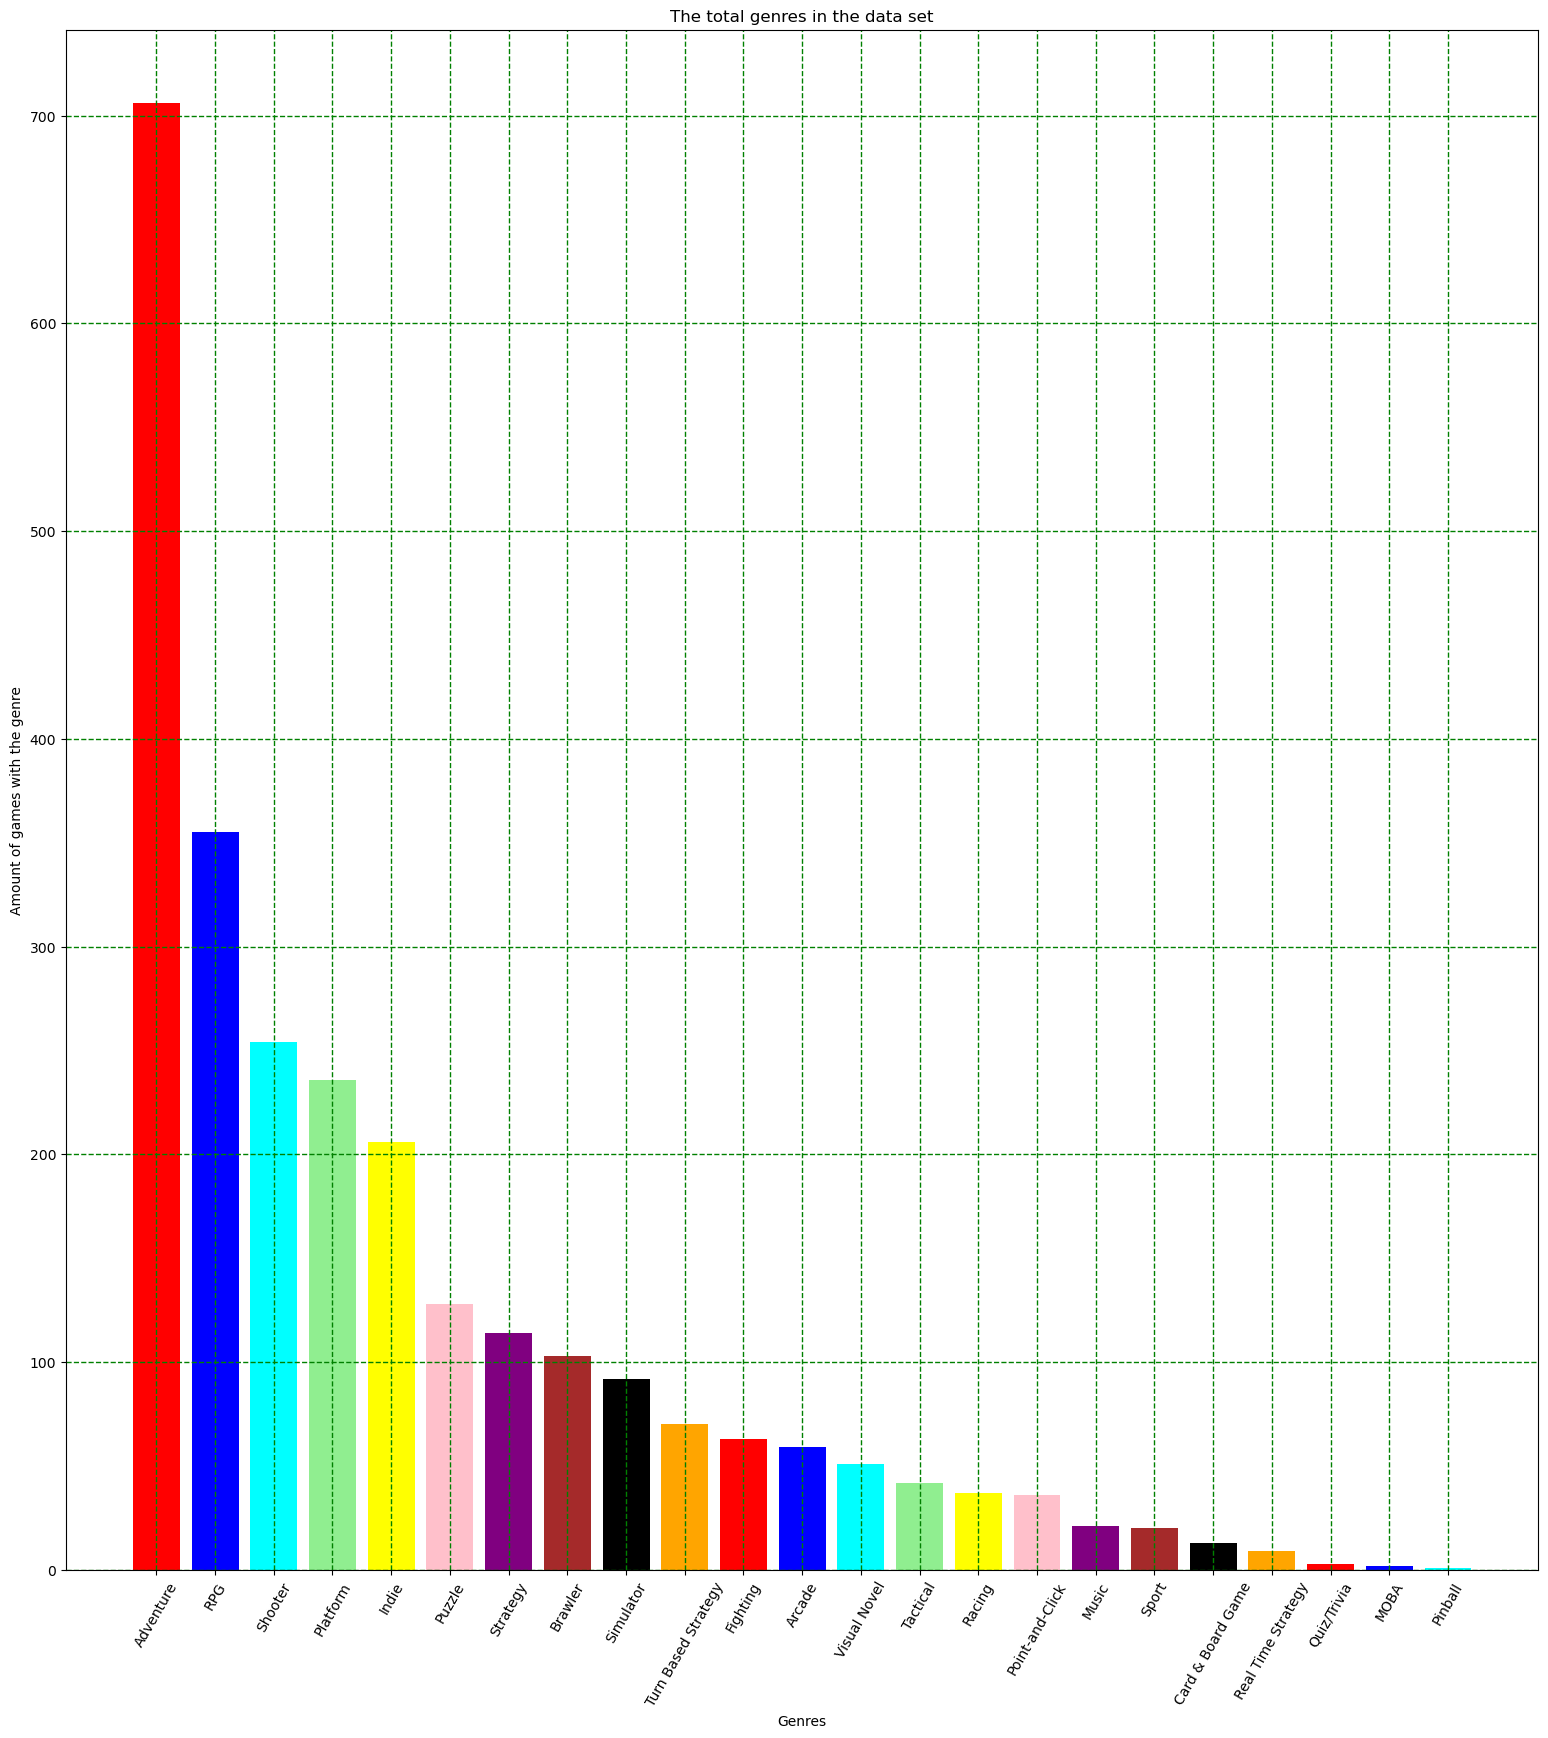

In [283]:
total_genres = df_game_exploded['Genres'].value_counts() # The total times the individual genres pop up
plt.figure(figsize=(19,20))
plt.bar(x = total_genres.index, color= ['red', 'blue', 'cyan', 'lightgreen', 'yellow', 'pink', 'purple', 'brown', 'black', 'orange'] ,height = total_genres.values)
plt.title("The total genres in the data set")
plt.xlabel("Genres")
plt.ylabel("Amount of games with the genre")
plt.xticks(rotation = 60)
plt.grid(color = 'green', linestyle = '--', linewidth = 1)
plt.show()

In [285]:
df_game_exploded['Genres'].value_counts() # show the direct 

Genres
Adventure              706
RPG                    355
Shooter                254
Platform               236
Indie                  206
Puzzle                 128
Strategy               114
Brawler                103
Simulator               92
Turn Based Strategy     70
Fighting                63
Arcade                  59
Visual Novel            51
Tactical                42
Racing                  37
Point-and-Click         36
Music                   21
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64

In [287]:
df_game_exploded.duplicated().sum() # checking if their is any more duplicates

0

### This is the wrost game and best game in the entire data frame via index/row

In [290]:
numeric_columns = df_game_K_removed.select_dtypes(include='number').fillna(0) # fill with any remaing rows with 0

row_sums = numeric_columns.sum(axis=1) # This will calculate the row of the score for every row.

best_index = row_sums.idxmax() # Best row
worst_index = row_sums.idxmin() # Worst row


best_game = df_game_K_removed.loc[best_index] # using Locate to find the best row 
worst_game = df_game_K_removed.loc[worst_index] # using Locate to find the worst row

print("Best Game:")
print(best_game) # w

print("\nWorst Game:")
print(worst_game)

Best Game:
Title                          The Legend of Zelda: Breath of the Wild
Release Date                                              Mar 03, 2017
Team                 ['Nintendo', 'Nintendo EPD Production Group No...
Rating                                                             4.4
Times Listed                                                    4300.0
Number of Reviews                                               4300.0
Genres                                               [Adventure,  RPG]
Summary              The Legend of Zelda: Breath of the Wild is the...
Reviews              ['This game is the game (that is not CS:GO) th...
Plays                                                          30000.0
Playing                                                         2500.0
Backlogs                                                        5000.0
Wishlist                                                        2600.0
Name: 2, dtype: object

Worst Game:
Title                         

The best game is The Legend of Zelda: Breath of the Wild. The worst game is  Better Call Saul Kart.

### Group by genres to see the group by aggregate functions
This is a basic summary report based on the genres

In [294]:
df_game_exploded_groupby = df_game_exploded.groupby('Genres') # group by the Genres of the dataframe
df_game_exploded_groupby

In [296]:
df_game_exploded.isnull().sum() # checking if their are non null values

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

This is a summary of my entire Data Frame using groupby

In [299]:
aggregate_function =df_game_exploded_groupby.agg({
    'Plays': ['max', 'min', 'sum', 'mean', 'std'],
    'Rating': ['max', 'min', 'sum', 'mean', 'std'],
    'Wishlist': ['max', 'min', 'sum', 'mean', 'std'], 
    'Backlogs': ['max', 'min', 'sum', 'mean', 'std'],
    'Playing': ['max', 'min', 'sum', 'mean', 'std'],
    'Number of Reviews': ['max', 'min', 'sum', 'mean', 'std'],
    'Times Listed': ['max', 'min', 'sum', 'mean', 'std'] 
    })
aggregate_function

Plays                                               \
                         max     min        sum         mean          std   
Genres                                                                      
Adventure            33000.0     1.0  3728155.0  5280.672805  5054.727591   
Arcade               19000.0   185.0   252952.0  4287.322034  4202.887322   
Brawler              21000.0   100.0   516769.0  5017.174757  4892.967006   
Card & Board Game     5500.0   847.0    43047.0  3311.307692  1461.036925   
Fighting             25000.0   186.0   250699.0  3979.349206  4298.803011   
Indie                28000.0    16.0   858627.0  4168.092233  4746.793536   
MOBA                 13000.0  4500.0    17500.0  8750.000000  6010.407640   
Music                 7300.0   183.0    50081.0  2384.809524  2002.528867   
Pinball               1600.0  1600.0     1600.0  1600.000000          NaN   
Platform             29000.0    69.0  1348330.0  5713.262712  5336.179028   
Point-and-Click      12000.0   471.0   130317.0  3619.916667  3556.211486   
Puzzle               29000.0    48.0   541497.0  4230.445312  4555.916198   
Quiz/Trivia           3000.0  1400.0     7100.0  2366.666667   850.490055   
RPG                  30000.0     1.0  1764559.0  4970.588732  5048.705781   
Racing               19000.0    26.0   225674.0  6099.297297  5893.739413   
Real Time Strategy   14000.0  1300.0    35900.0  3988.888889  3982.914901   
Shooter              30000.0   100.0  1573770.0  6195.944882  5444.100288   
Simulator            33000.0    61.0   415818.0  4519.760870  5289.529312   
Sport                18000.0   431.0    77833.0  3891.650000  5716.718458   
Strategy             25000.0    16.0   459139.0  4027.535088  4573.097723   
Tactical             14000.0    16.0   179629.0  4276.880952  4138.160892   
Turn Based Strategy  28000.0    16.0   381284.0  5446.914286  4918.573526   
Visual Novel         14000.0     8.0   152382.0  2987.882353  3573.589779   

                    Rating                                   ...  \
                       max  min     sum      mean       std  ...   
Genres                                                       ...   
Adventure              4.8  0.7  2612.4  3.700283  0.542388  ...   
Arcade                 4.3  1.6   208.3  3.530508  0.535709  ...   
Brawler                4.6  1.6   376.7  3.657282  0.523113  ...   
Card & Board Game      4.1  2.8    46.0  3.538462  0.375363  ...   
Fighting               4.2  1.8   212.9  3.379365  0.537065  ...   
Indie                  4.6  1.2   751.1  3.646117  0.534342  ...   
MOBA                   2.7  2.1     4.8  2.400000  0.424264  ...   
Music                  4.3  2.8    75.0  3.571429  0.474492  ...   
Pinball                3.5  3.5     3.5  3.500000       NaN  ...   
Platform               4.5  1.4   857.6  3.633898  0.529347  ...   
Point-and-Click        4.6  2.4   131.7  3.658333  0.506176  ...   
Puzzle                 4.6  1.2   478.6  3.739063  0.512249  ...   
Quiz/Trivia            3.8  2.9     9.9  3.300000  0.458258  ...   
RPG                    4.8  2.1  1341.3  3.778310  0.481825  ...   
Racing                 4.3  2.5   130.5  3.527027  0.475306  ...   
Real Time Strategy     4.3  2.5    32.6  3.622222  0.653410  ...   
Shooter                4.6  0.7   912.9  3.594094  0.560566  ...   
Simulator              4.6  2.1   332.4  3.613043  0.532508  ...   
Sport                  4.3  2.6    70.4  3.520000  0.481882  ...   
Strategy               4.6  1.9   409.6  3.592982  0.595220  ...   
Tactical               4.6  2.5   157.6  3.752381  0.530641  ...   
Turn Based Strategy    4.6  2.3   267.1  3.815714  0.466139  ...   
Visual Novel           4.6  3.0   203.9  3.998039  0.370670  ...   

                    Number of Reviews                               \
                                  max    min       sum        mean   
Genres                                                               
Adventure                      4300.0   1

## This is a Scatter plot for the total game that share the same rating
This shows the total games that have the same rating in the data frame
The rating 4 is the most common.

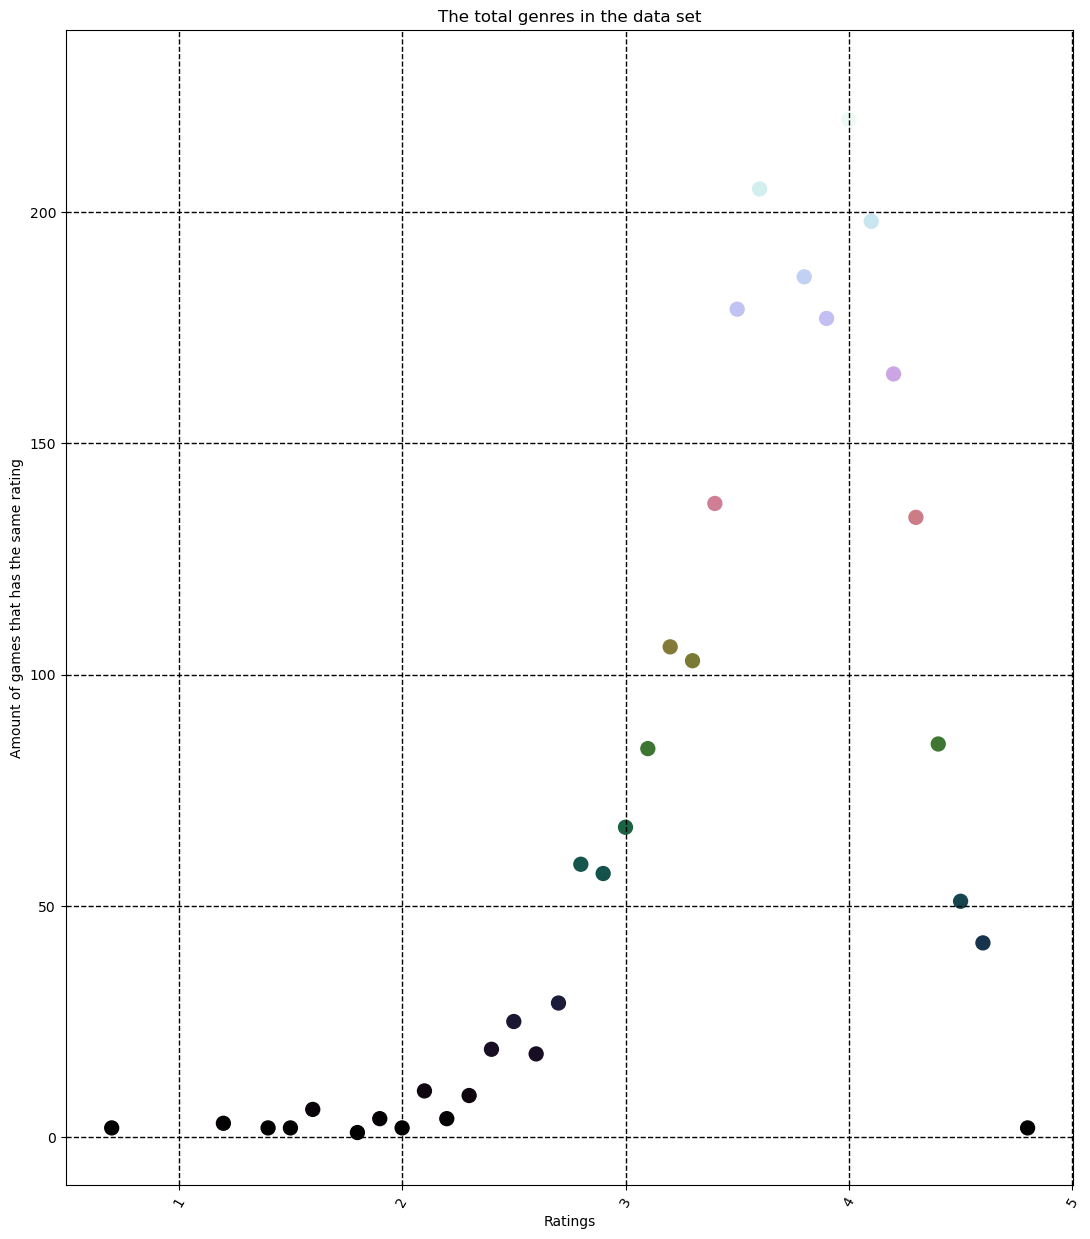

In [302]:
df_game_exploded_rating = df_game_exploded['Rating'].value_counts()
plt.figure(figsize=(13,15))
sizes = 100
plt.scatter(x = df_game_exploded_rating.index, c=df_game_exploded_rating.values, cmap = 'cubehelix' , s = sizes, y = df_game_exploded_rating.values)
plt.title("The total genres in the data set")
plt.xlabel("Ratings")
plt.ylabel("Amount of games that has the same rating")
plt.xticks(rotation = 60)
plt.grid(color = 'black', linestyle = '--', linewidth = 1)
plt.show()

## A Scatter plot that shows which Genres have the most wishlisted
Before I was able to make this I had to make a pivot table.

In [305]:
pivoted_table1 = pd.pivot_table(df_game_exploded, values = 'Wishlist', index = 'Genres', aggfunc = 'mean')
pivoted_table1 # Wish list table compared with the genres

,Wishlist
Genres,
Adventure,726.978754
Arcade,334.050847
Brawler,875.553398
Card & Board Game,325.692308
Fighting,220.507937
Indie,662.063107
MOBA,58.500000
Music,335.571429
Pinball,69.000000


Brawler games were the most wishlisted genre.
Quiz Trivia was the least wishlisted genre.

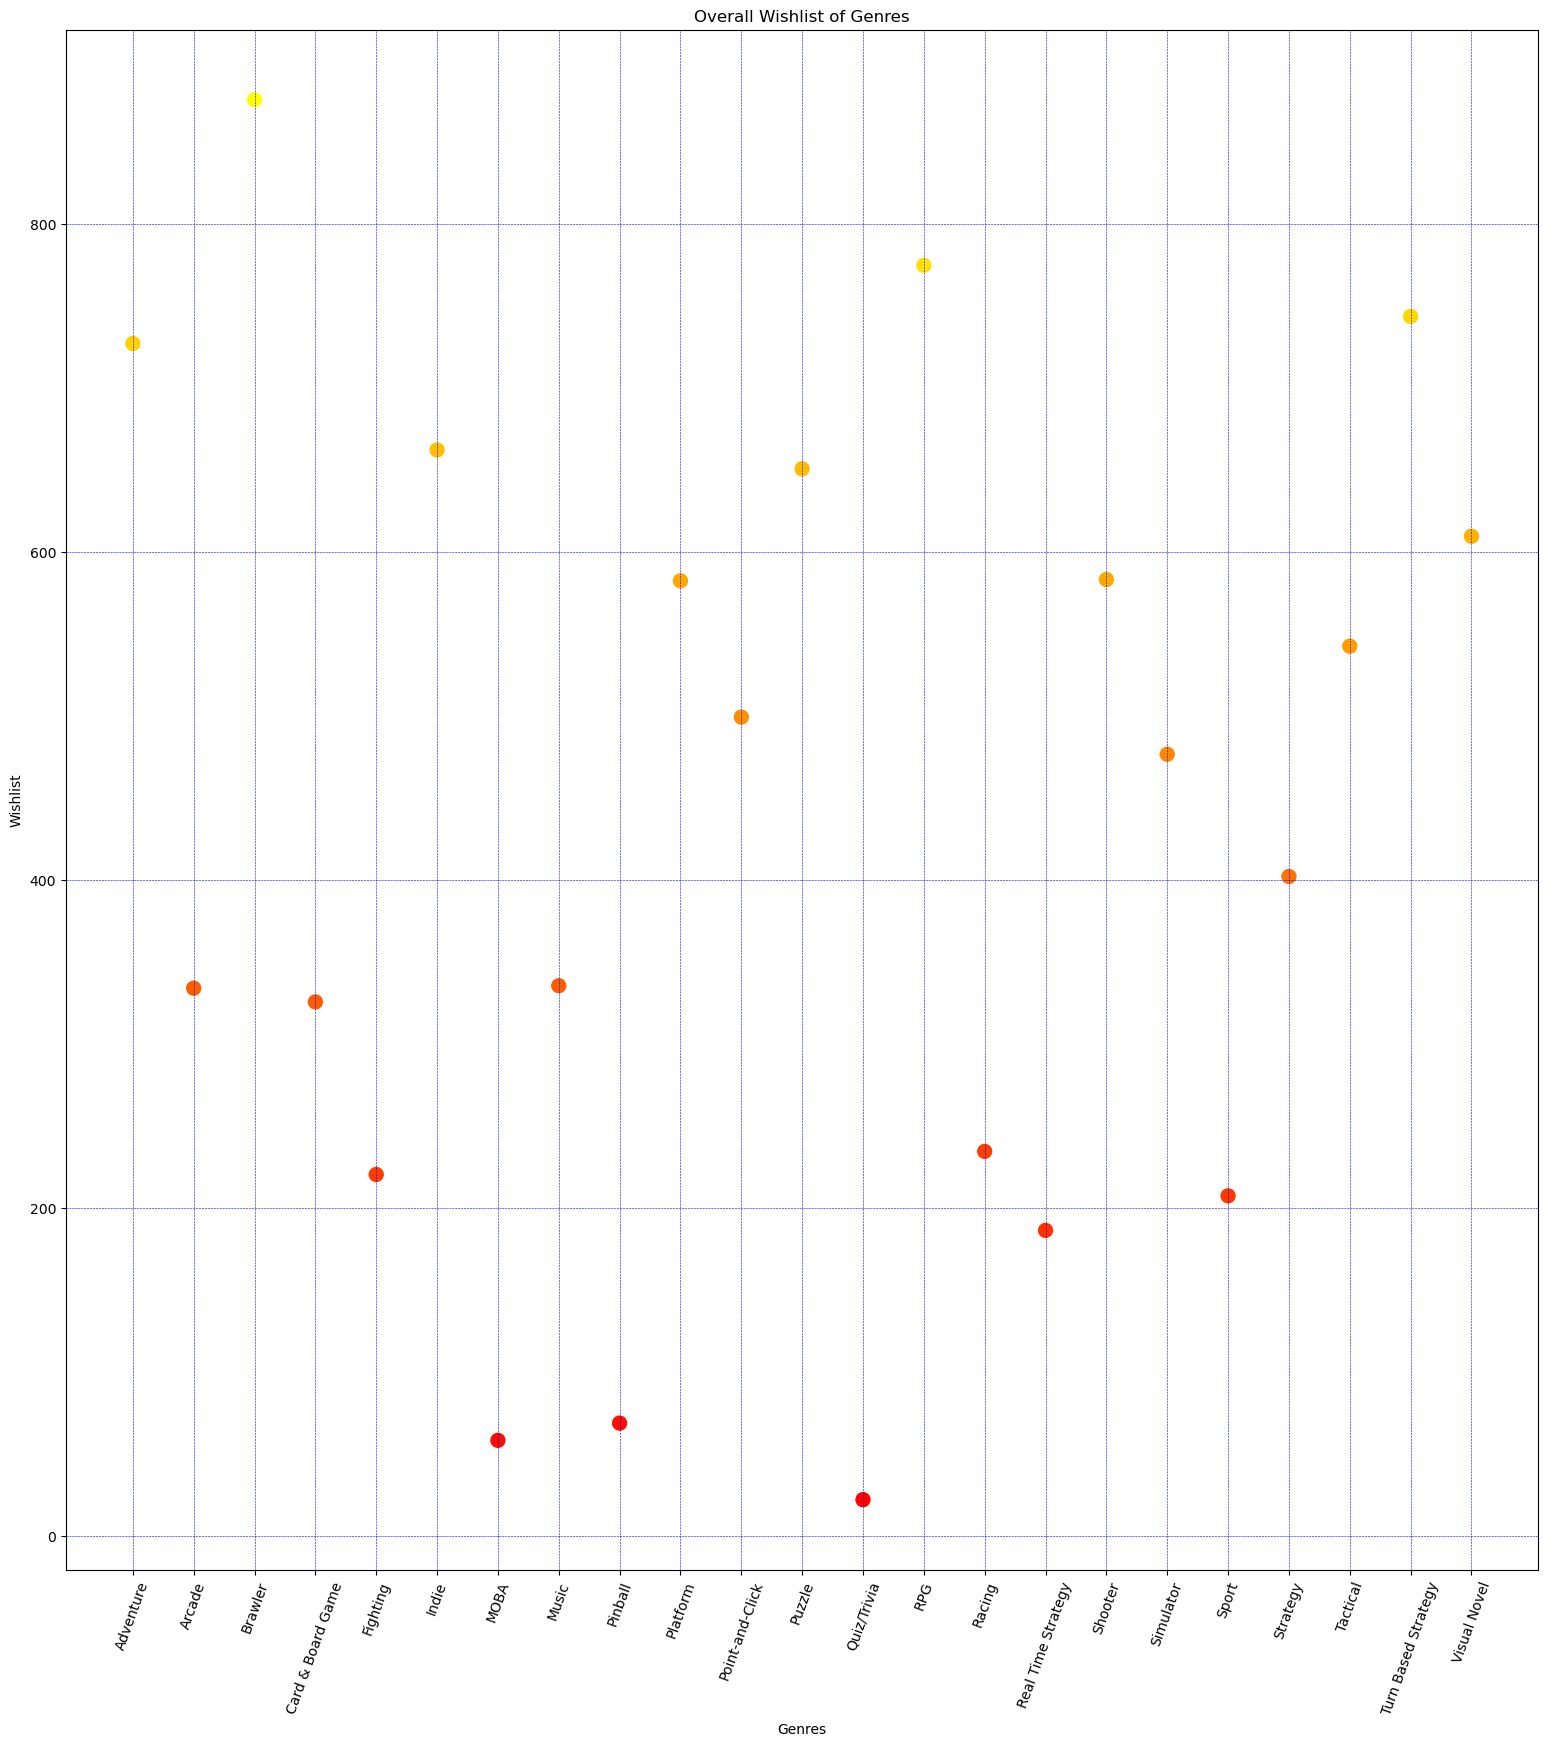

In [308]:
plt.figure(figsize=(19,20))
plt.scatter(x = pivoted_table1.index, c = pivoted_table1['Wishlist'],  cmap = 'autumn', s = sizes, y = pivoted_table1['Wishlist'])
plt.title("Overall Wishlist of Genres")
plt.xlabel("Genres")
plt.ylabel("Wishlist")
plt.xticks(rotation = 70)
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.4)
plt.show()

## This is to see genres and their over all ratings in a scatter plot
I made a pivot table to get the genres and the ratings of the the genres                               

In [311]:
pivoted_game = pd.pivot_table(df_game_exploded, values = 'Rating', index = 'Genres', aggfunc = 'mean')
pivoted_game
# Made a pivot table with the genres and ratings

,Rating
Genres,
Adventure,3.700283
Arcade,3.530508
Brawler,3.657282
Card & Board Game,3.538462
Fighting,3.379365
Indie,3.646117
MOBA,2.400000
Music,3.571429
Pinball,3.500000


In [313]:
pivoted_game.fillna('')

,Rating
Genres,
Adventure,3.700283
Arcade,3.530508
Brawler,3.657282
Card & Board Game,3.538462
Fighting,3.379365
Indie,3.646117
MOBA,2.400000
Music,3.571429
Pinball,3.500000


The game genre that has the highest rating is visual novel the game with the lowest rating is
quiz/trivia

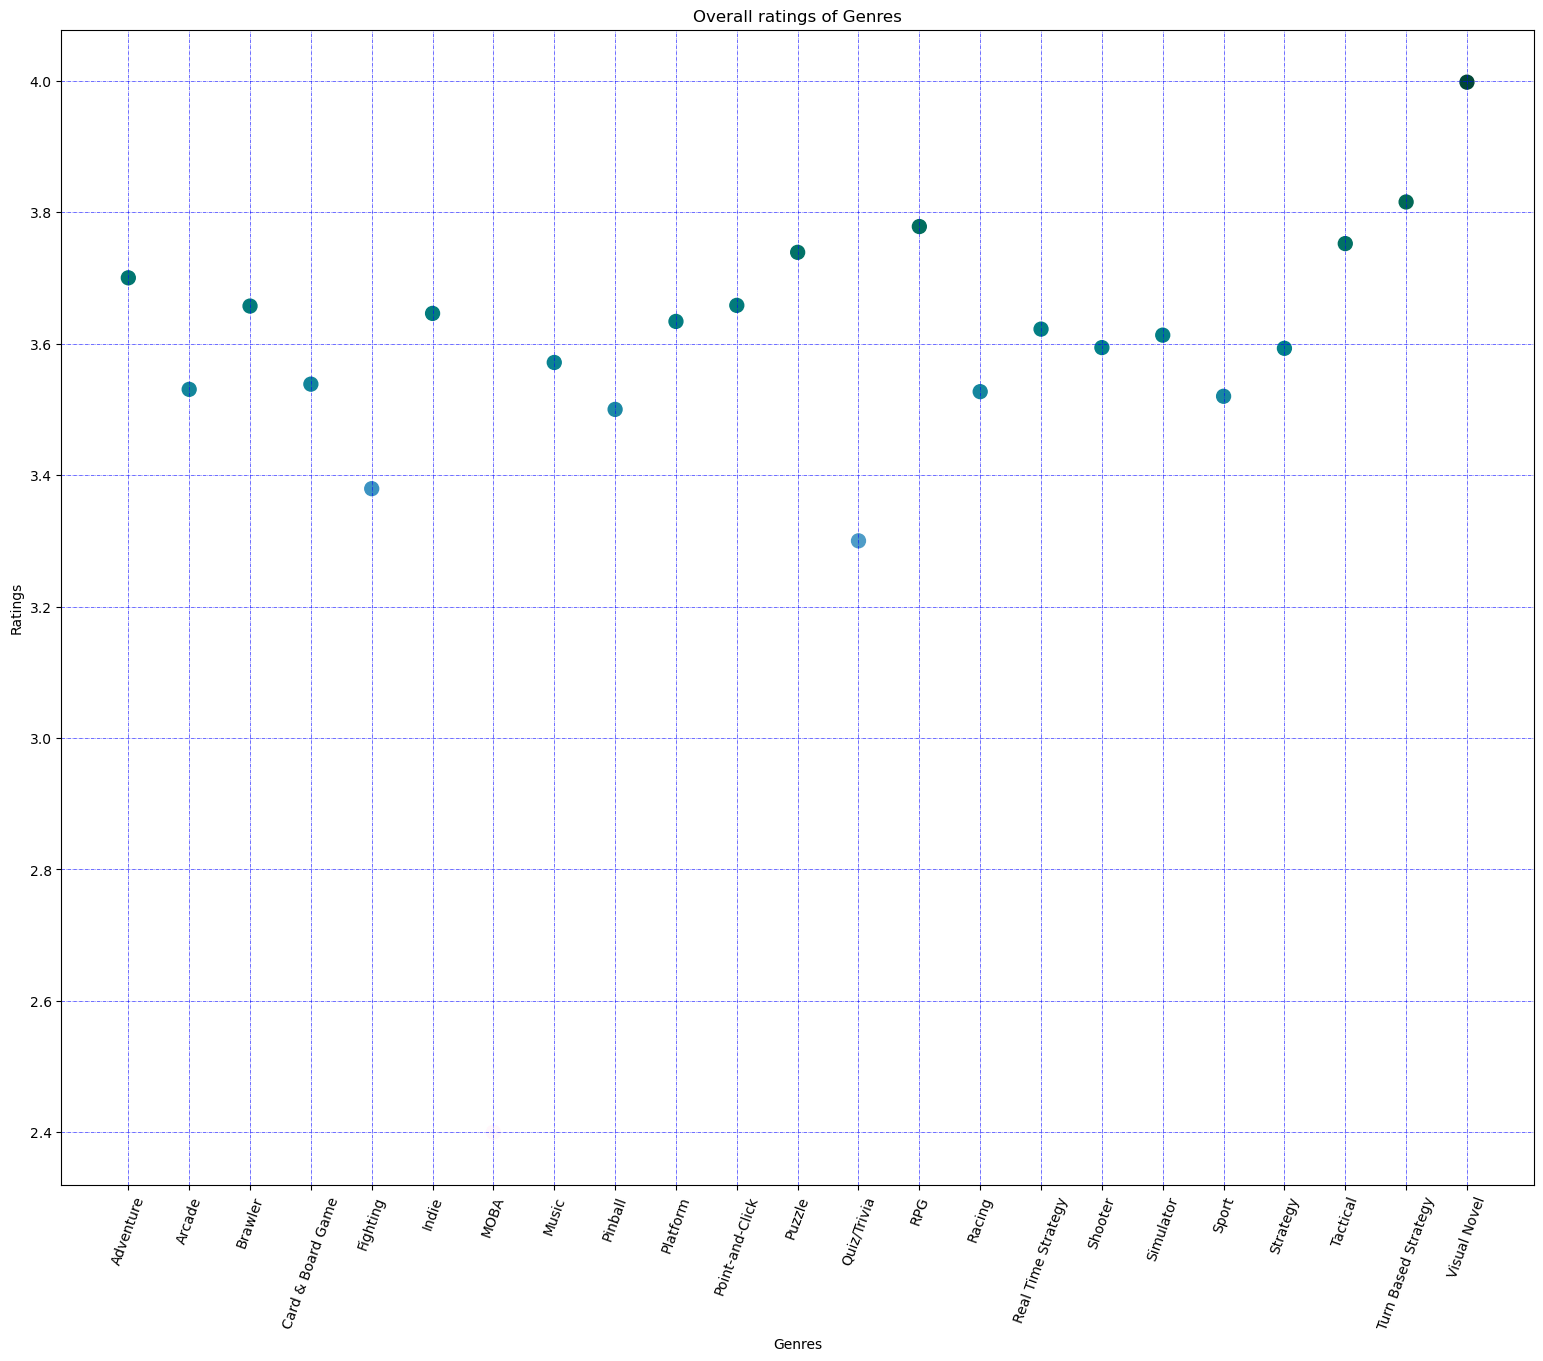

In [316]:
plt.figure(figsize=(19,15))
sizes = 100

plt.scatter(x = pivoted_game.index, c = pivoted_game['Rating'],  cmap = 'PuBuGn', s = sizes, y = pivoted_game['Rating'])
plt.title("Overall ratings of Genres")
plt.xlabel("Genres")
plt.ylabel("Ratings")
plt.xticks(rotation = 70)
plt.grid(color = 'blue', linestyle = '-.', linewidth = 0.4)
plt.show()
           

## A Scatter plot that show the genres that had the most total plays
I had made a pivote table to see total plays for the genres

In [319]:
pivoted_plays = pd.pivot_table(df_game_exploded, values = 'Plays', index = 'Genres', aggfunc = 'mean')
pivoted_plays

,Plays
Genres,
Adventure,5280.672805
Arcade,4287.322034
Brawler,5017.174757
Card & Board Game,3311.307692
Fighting,3979.349206
Indie,4168.092233
MOBA,8750.000000
Music,2384.809524
Pinball,1600.000000


The genre that has the most plays is MOBA's and the one that has the least is quiz/trivia.

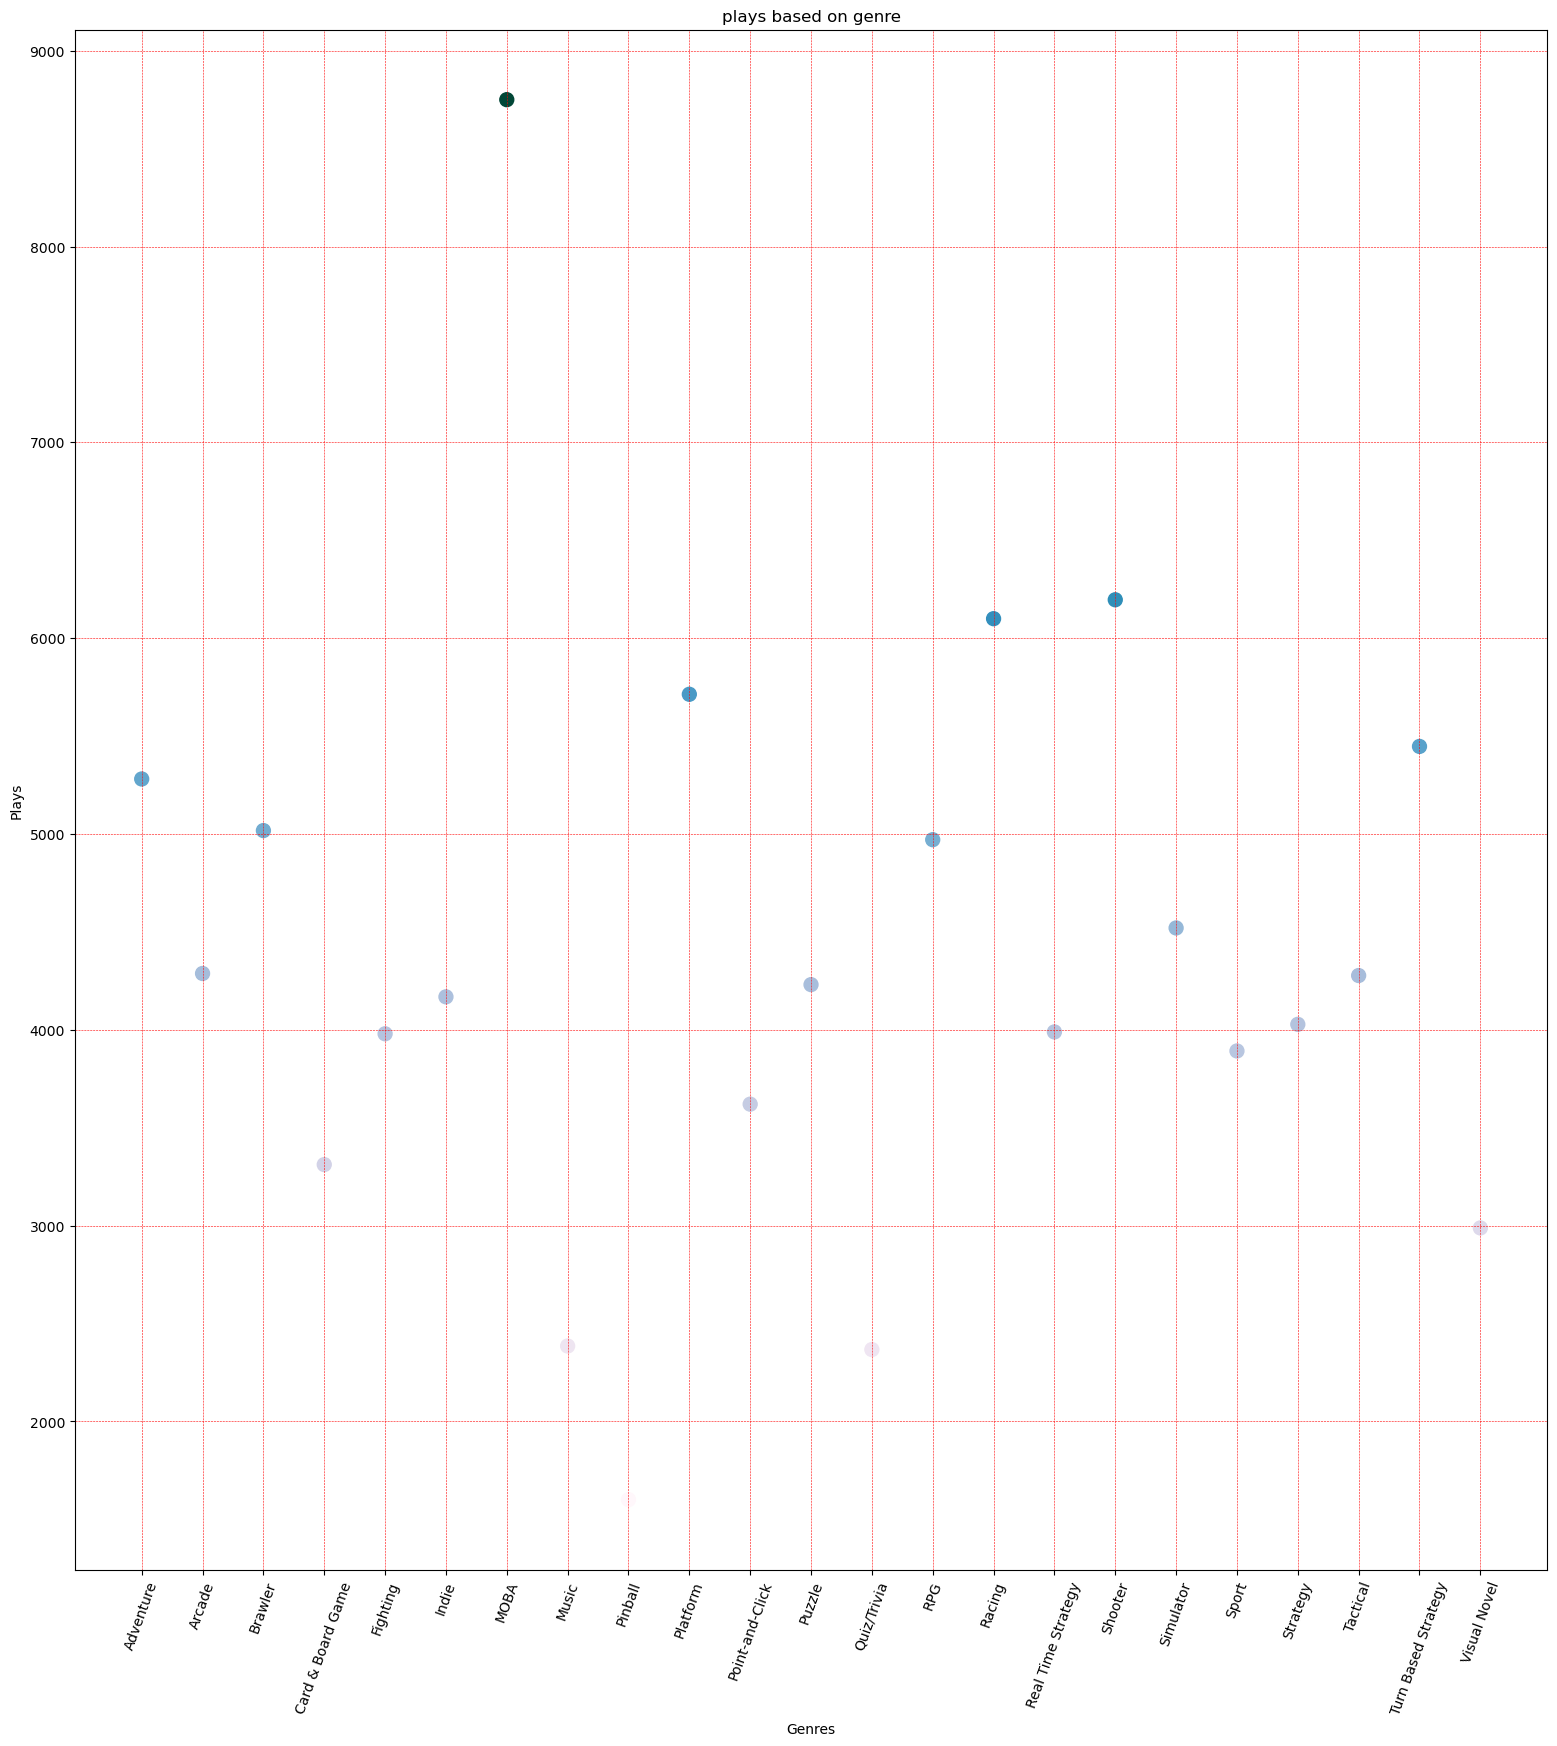

In [322]:
plt.figure(figsize=(19,20))
sizes = 100

plt.scatter(x = pivoted_plays.index, c = pivoted_plays['Plays'],  cmap = 'PuBuGn', s = sizes, y = pivoted_plays['Plays'])
plt.title("plays based on genre")
plt.xlabel("Genres")
plt.ylabel("Plays")
plt.xticks(rotation = 70)
plt.grid(color = 'red', linestyle = '--', linewidth = 0.4)
plt.show()

## A scatter plot that see which genres are currently being played.
I made a pivot table to show what games are people are currentlying playing

In [325]:
pivoted_playing = pd.pivot_table(df_game_exploded, values = 'Playing', index = 'Genres', aggfunc = 'mean')
pivoted_playing

,Playing
Genres,
Adventure,214.160057
Arcade,118.372881
Brawler,244.970874
Card & Board Game,125.307692
Fighting,87.190476
Indie,200.868932
MOBA,731.500000
Music,107.380952
Pinball,23.000000


People are playing MOBA games the most currently and pinball games are being played the least.

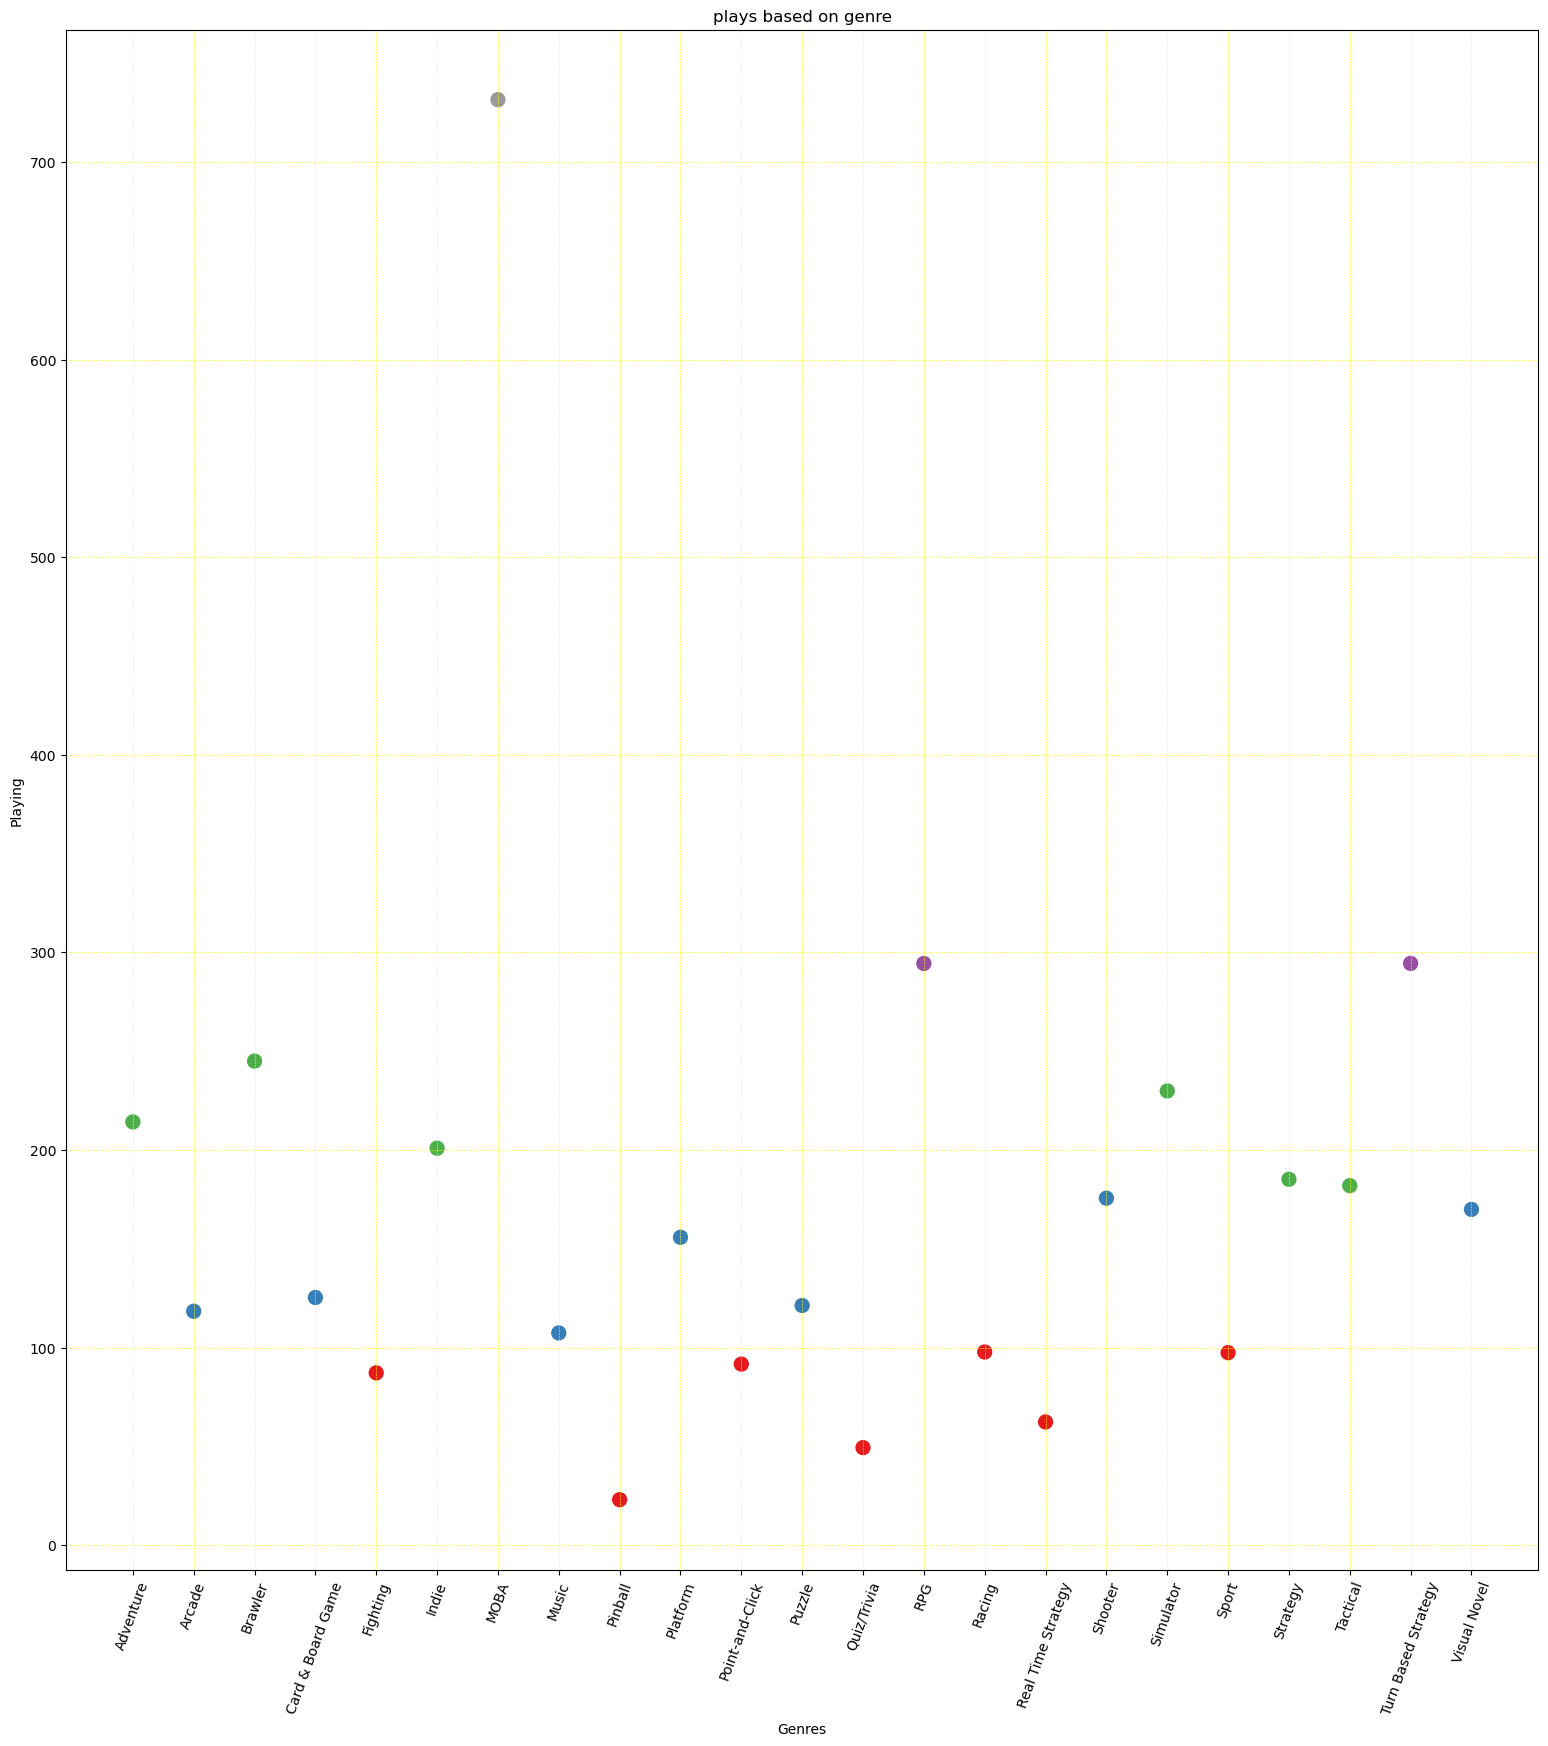

In [328]:
plt.figure(figsize=(19,20))
sizes = 100

plt.scatter(x = pivoted_playing.index, c = pivoted_playing['Playing'],  cmap = 'Set1', s = sizes, y = pivoted_playing['Playing'])
plt.title("plays based on genre")
plt.xlabel("Genres")
plt.ylabel("Playing")
plt.xticks(rotation = 70)
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.4)
plt.show()

## This is a scatter plot for the genres that were listed on store fronts
I created a pivot table for the timeslisted for genres 

In [331]:
pivoted_TimesListed = pd.pivot_table(df_game_exploded, values = 'Times Listed', index = 'Genres', aggfunc = 'mean')
pivoted_TimesListed

,Times Listed
Genres,
Adventure,691.522663
Arcade,437.000000
Brawler,694.097087
Card & Board Game,324.000000
Fighting,361.952381
Indie,502.922330
MOBA,384.500000
Music,284.000000
Pinball,135.000000


Turn Based Strategy was listed the most. And the least listed was quiz/trivia.

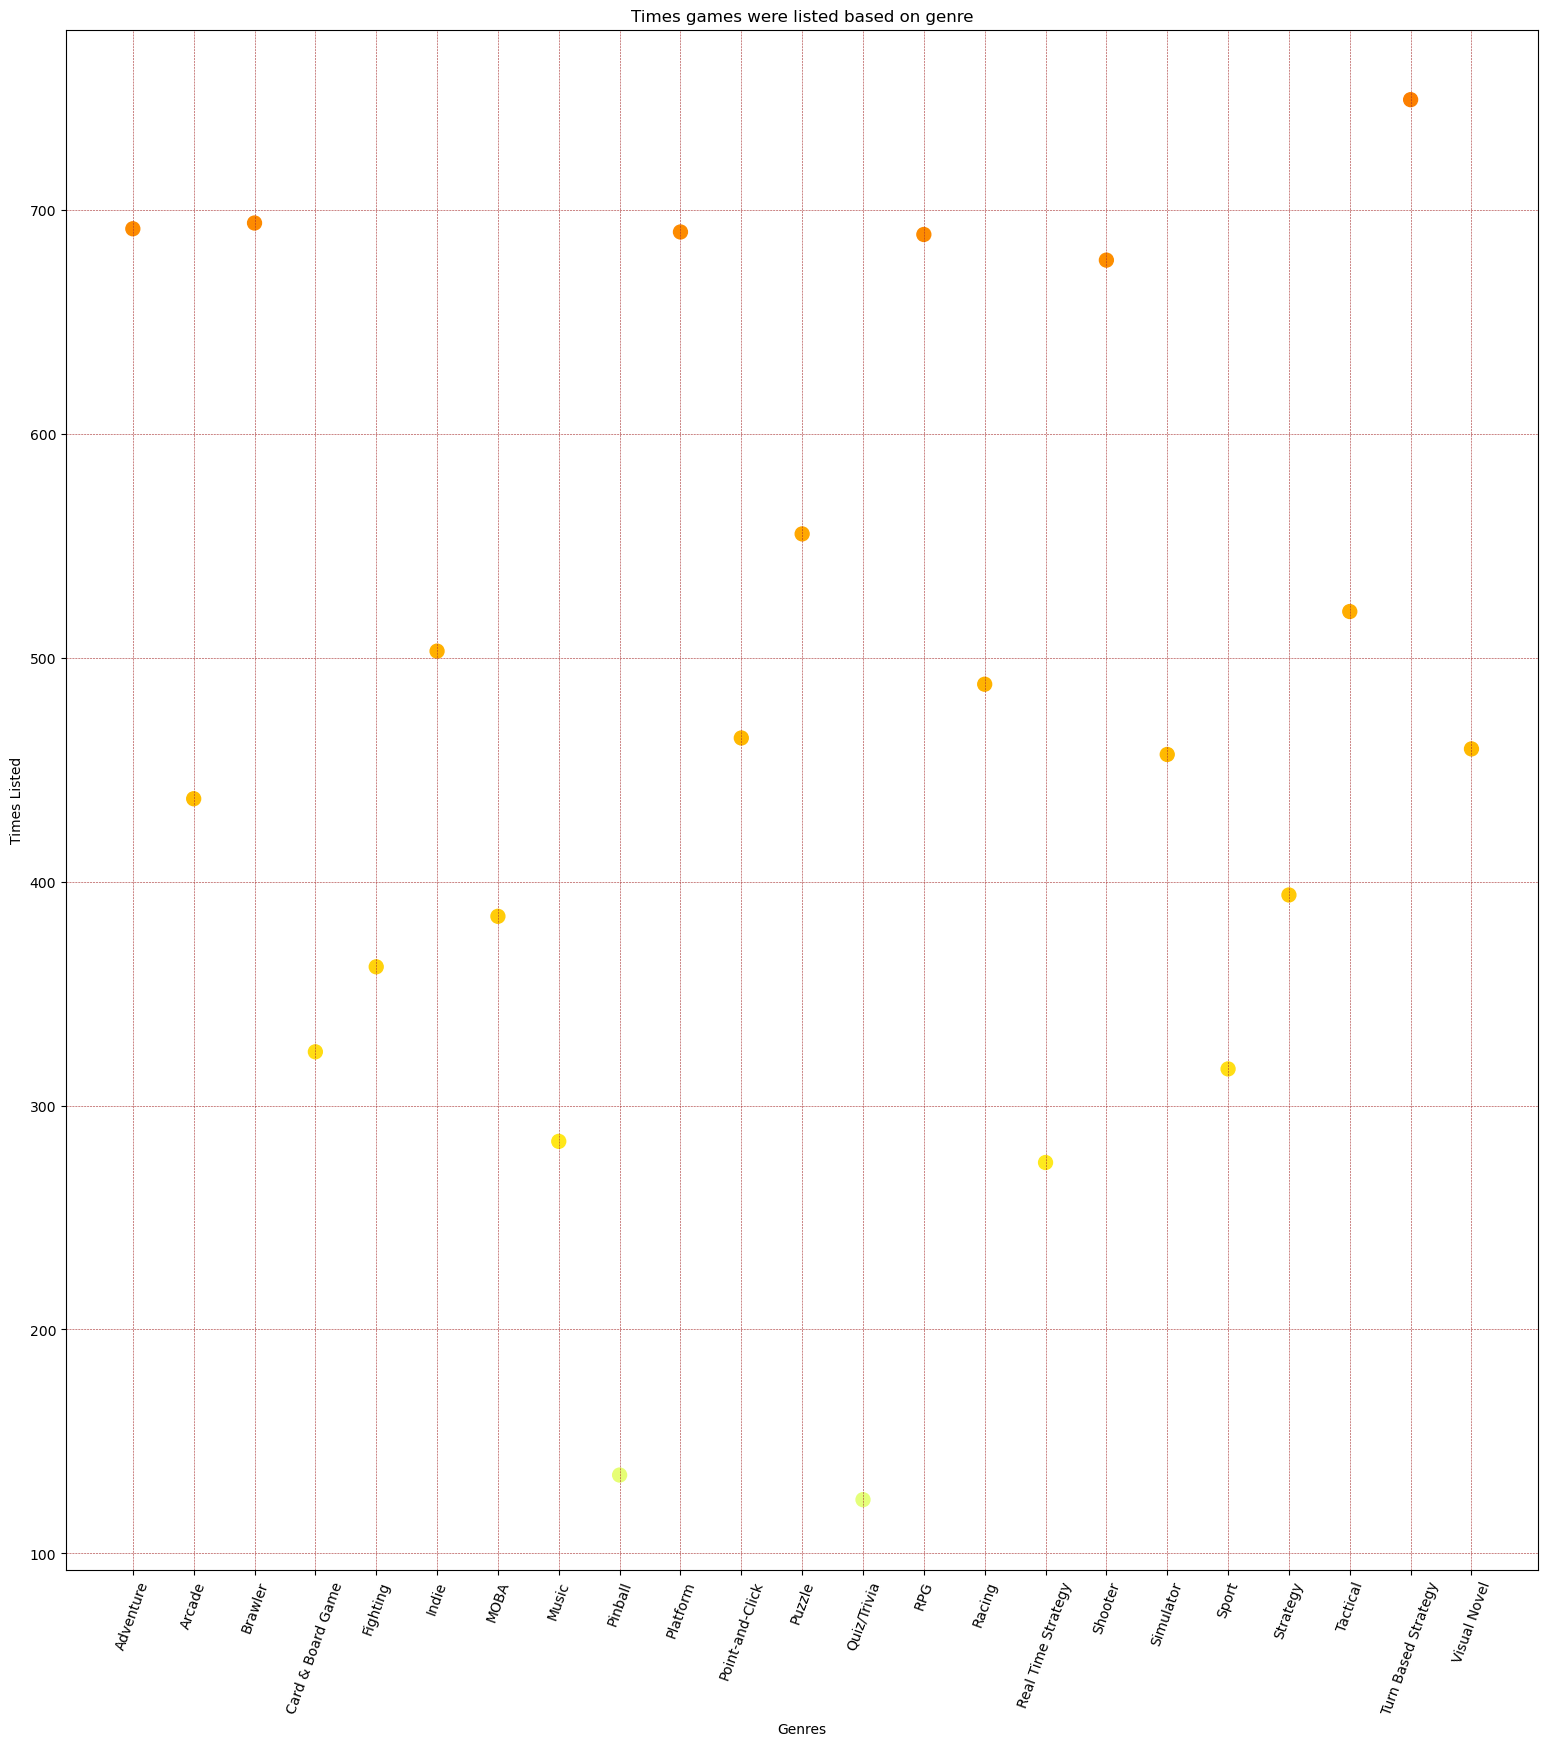

In [334]:
plt.figure(figsize=(19,20))
sizes = 100

plt.scatter(x = pivoted_TimesListed.index, c = pivoted_TimesListed['Times Listed'],  cmap = 'Wistia', s = sizes, y = pivoted_TimesListed['Times Listed'])
plt.title("Times games were listed based on genre")
plt.xlabel("Genres")
plt.ylabel("Times Listed")
plt.xticks(rotation = 70)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.4)
plt.show()

## This the corrleation of back logs to the entire dataframe
I use df_game_exploded to see the correlation of blacklogs to the rest of the data frame

In [337]:
corr = df_game_exploded.corr(numeric_only=True)
corr

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
Rating,1.000000,0.390051,0.390051,0.146914,0.249434,0.397544,0.437113
Times Listed,0.390051,1.000000,1.000000,0.821625,0.684083,0.845233,0.728466
Number of Reviews,0.390051,1.000000,1.000000,0.821625,0.684083,0.845233,0.728466
Plays,0.146914,0.821625,0.821625,1.000000,0.541337,0.618909,0.381977
Playing,0.249434,0.684083,0.684083,0.541337,1.000000,0.678046,0.667203
Backlogs,0.397544,0.845233,0.845233,0.618909,0.678046,1.000000,0.812165
Wishlist,0.437113,0.728466,0.728466,0.381977,0.667203,0.812165,1.000000


Backlogs has a postive correlation with 
* Number of Reviews 
* TimesListed
* Plays 
* Playing
* Wishlist

Backlogs doesn't really have a correlation with Ratings.

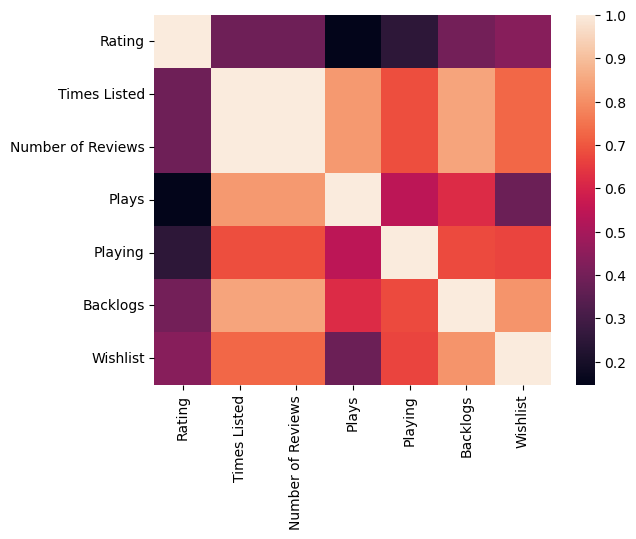

In [340]:
sns.heatmap(corr);
# A heat map of the correlation

### My Thoughs on this project
I Believe the hardest part of this project was getting the data frame cleaned up. It was especially difficult
to be able to get the K values from the data frame removed. I believe that it was easy to graph the dataframe.
I did enjoy the finsh product of df_game_exploded because I was able to get more accurate data of the genres which was
the corner stone of my dataframe. I decided to choose this data frame because I wanted decipher data related to video games which is what I often do as a hobby. Overall, I really enjoyed doing this project.
